In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

## Arbres de Décisions - matrices dans N, gini, entropie, racine, feuilles, enbranchements

In [3]:
data1 = { 'covid19+':[1, 0, 0, 1, 1, 1, 0, 0, 1, 0],   # il nous faut que des décisions oui=1 non=0 donc des matrices binaires
              'toux':[1, 1, 1, 1, 1, 1, 0, 1, 1, 1],   # ou bien avec des colonnes de nombre entiers de 0, 1, 2, ...n pour n+1 classes de choix
       'maux_ventre':[0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
         'maux_tete':[1, 1, 0, 1, 1, 1, 1, 0, 1, 0]}
df1 = pd.DataFrame(data=data1)
df1

,covid19+,toux,maux_ventre,maux_tete
0,1,1,0,1
1,0,1,0,1
2,0,1,1,0
3,1,1,0,1
4,1,1,0,1
5,1,1,0,1
6,0,0,1,1
7,0,1,0,0
8,1,1,0,1
9,0,1,0,0


### - 1 Choix du 1er test à utiliser par le gini = pureté de l'info ou l'entropie = désordre de l'info

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [5]:
y = df1['covid19+']

In [6]:
X = df1.drop(['covid19+'], axis=1)
print(type(X))
print(X.shape)

#X[:, 0]
# X.loc[:, 'toux']

<class 'pandas.core.frame.DataFrame'>
(10, 3)


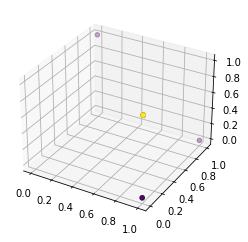

In [7]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

ax.scatter(X.loc[:, 'toux'], X.loc[:, 'maux_ventre'], X.loc[:, 'maux_tete'], c=y)
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)  # ne fonctionne pas car X-> dataframe, et ce code demande un type numpy.ndarray docn il faut utiliser le .loc
# graph 3D inutile ici car tous les points ont des coordonnées 0 ou 1 donc peu de pts visibles car confondus

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
model = DecisionTreeClassifier(max_depth=none)
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

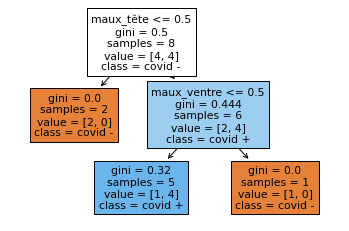

In [13]:
plot_tree(model, feature_names=('toux', 'maux_ventre', 'maux_tête'), class_names=('covid -', 'covid +'), filled=True)
# ici class_names = True tout d'abord pour voir class = y[0] et class = y[1] => d'où ensuite (y[0]=covid-, y[1]=covid+)
# car j'ai décidé 0 = négatif au covid et 1 = positif au covid
plt.show()

### arbre sur fleurs d'iris

X.shape (150, 4)
y.shape (150,)
variables ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
targets ['setosa' 'versicolor' 'virginica']


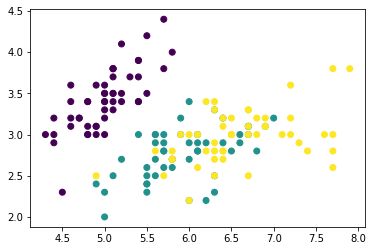

In [14]:
iris = load_iris()
X = iris.data
y = iris.target
print('X.shape', X.shape)
print('y.shape', y.shape)
print('variables', iris.feature_names)
print('targets', iris.target_names)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

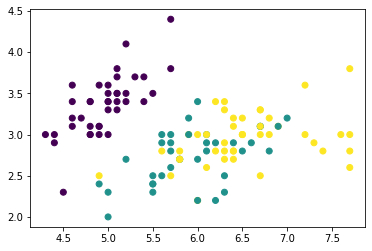

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [16]:
model = DecisionTreeClassifier(max_depth=None)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9666666666666667

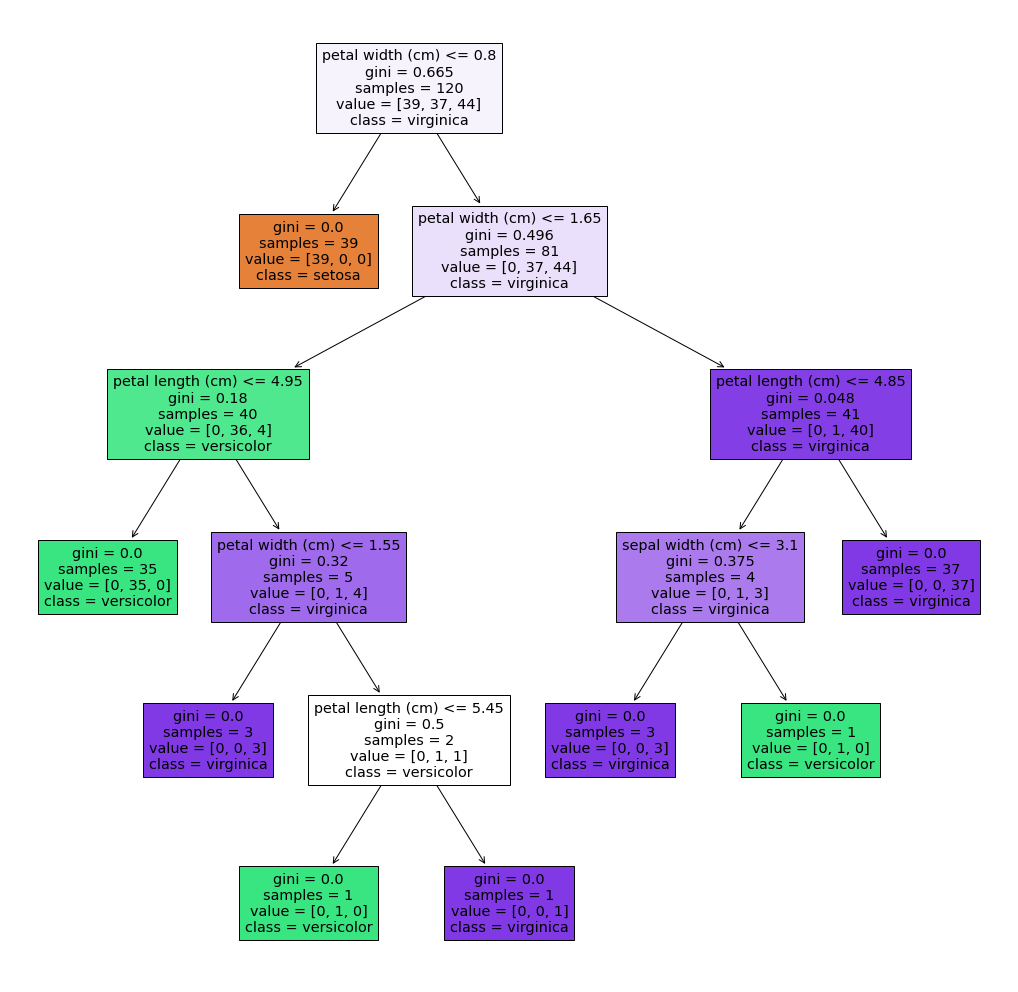

In [17]:
plt.figure(figsize=(18, 18))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

In [18]:
import seaborn as sns

In [19]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [26]:
titanic = titanic.dropna(axis=0)
y = titanic['survived']
X = titanic[['pclass', 'age', 'sex']]
X['sex'].replace(['male', 'female'],[0, 1], inplace=True)

C:\Users\UserPC\AppData\Local\Temp\ipykernel_7680\1662325587.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'].replace(['male', 'female'],[0, 1], inplace=True)


In [40]:
model = DecisionTreeClassifier(max_depth=4, criterion='entropy').fit(X, y)

In [41]:
# pas de train set ni test set ici !!! pour du rapide
X['sex'].value_counts()

0    94
1    88
Name: sex, dtype: int64

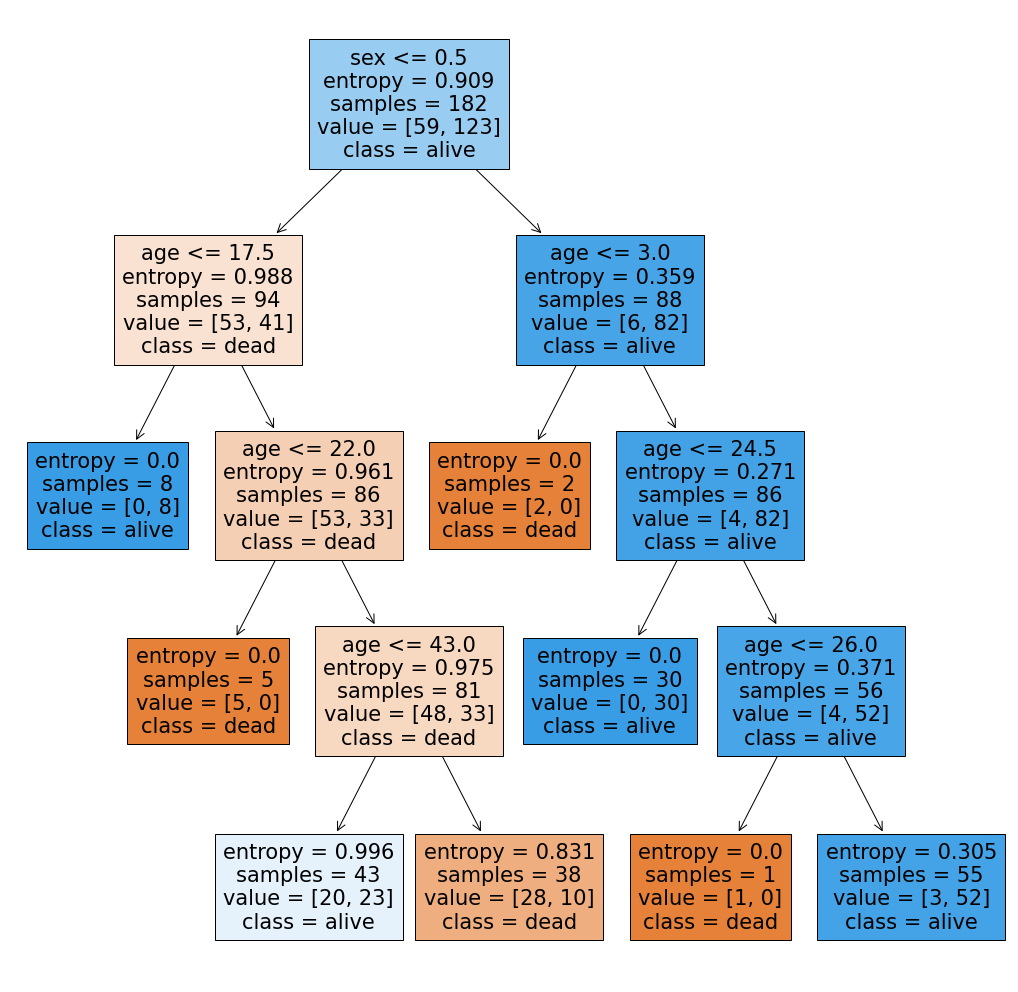

In [42]:
plt.figure(figsize=(18, 18))
plot_tree(model, feature_names=('pclass', 'age', 'sex'), class_names=('dead', 'alive'), filled=True)
plt.show()
# male = 0, female = 1